#Задание

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора **fashion_mnist**, выполните следующие действия:

1. Создайте **9** моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.  Используйте следующее деление: обучающая выборка - **50000** примеров, проверочная выборка - **10000** примеров, тестовая выборка - **10000** примеров.

2. Создайте сравнительную таблицу в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

# Шаблон ноутбука

##Импорт библиотек

In [1]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam, Adadelta

# Библиотека для работы с массивами
import numpy as np

# Библиотека для работы с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Связь с google-диском
from google.colab import files

# Предварительная обработка данных
from sklearn import preprocessing

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from keras.datasets import fashion_mnist

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

##Описание базы

###База: одежда, обувь и аксессуары
- Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.
- Изображения одного вида хранятся в numpy-массиве **(28, 28)** - **x_train, x_test**.
- База содержит **10** классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - **y_train, y_test**.
- Примеров: train - **60000**, test - **10000**.

###Вывод примеров

In [2]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Вывод размерностей выборок

print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


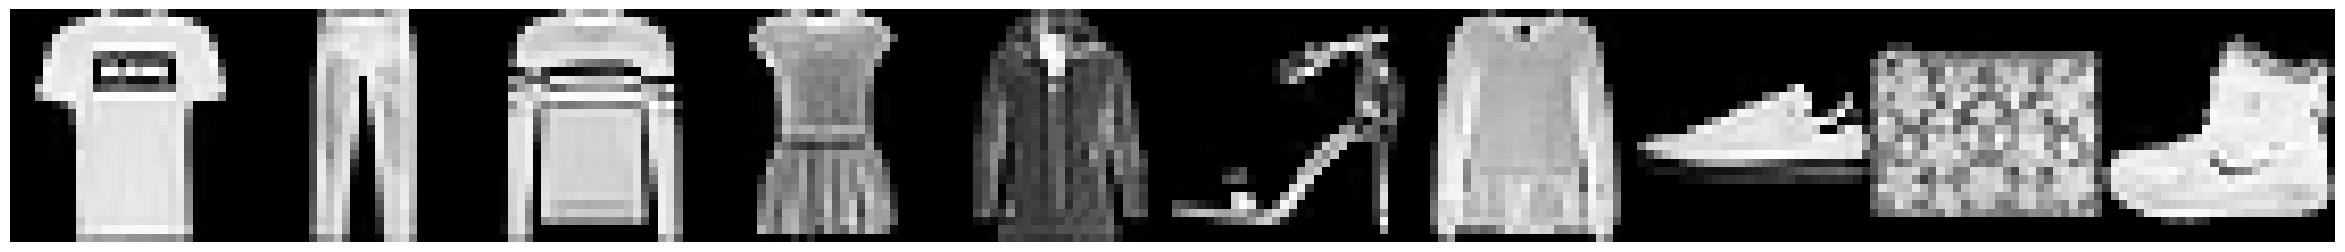

In [3]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train[y_train==i][0] for i in range(10)])

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)

# Создание поля для изображения
plt.figure(figsize=(30, 6))

# Отрисовка итогового изображения
plt.imshow(imgs, cmap='Greys_r')

# Без сетки
plt.grid(False)

# Без осей
plt.axis('off')

# Вывод результата
plt.show()

In [ ]:
# Ваше решение

In [6]:
# Разделение данных на обучающую, проверочную и тестовую выборки
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1667, random_state=42)

# Нормализация данных
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

In [5]:
# Определение архитектур
models = {
    "Model_1": Sequential([
        Dense(128, activation='relu', input_shape=(28*28,)),
        Dense(10, activation='softmax')
    ]),
    "Model_2": Sequential([
        Dense(256, activation='relu', input_shape=(28*28,)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]),
    "Model_3": Sequential([
        Dense(512, activation='relu', input_shape=(28*28,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]),
    "Model_4": Sequential([
        Dense(128, activation='relu', input_shape=(28*28,)),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ]),
    "Model_5": Sequential([
        Dense(256, activation='relu', input_shape=(28*28,)),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]),
    "Model_6": Sequential([
        Dense(512, activation='relu', input_shape=(28*28,)),
        BatchNormalization(),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]),
    "Model_7": Sequential([
        Dense(128, activation='relu', input_shape=(28*28,)),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ]),
    "Model_8": Sequential([
        Dense(256, activation='relu', input_shape=(28*28,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]),
    "Model_9": Sequential([
        Dense(512, activation='relu', input_shape=(28*28,)),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
}

# Преобразование данных
x_train = x_train.reshape(-1, 28*28)
x_val = x_val.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Компиляция и обучение моделей
results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results.append([name, val_acc, test_acc])

# Сравнительная таблицы
results_df = pd.DataFrame(results, columns=['Model', 'Validation Accuracy', 'Test Accuracy'])
print(results_df)

results_df.sort_values(by='Test Accuracy', ascending=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model_1...
Training Model_2...
Training Model_3...
Training Model_4...
Training Model_5...
Training Model_6...
Training Model_7...
Training Model_8...
Training Model_9...
     Model  Validation Accuracy  Test Accuracy
0  Model_1             0.884723         0.8779
1  Model_2             0.880124         0.8744
2  Model_3             0.883923         0.8829
3  Model_4             0.880924         0.8763
4  Model_5             0.881624         0.8746
5  Model_6             0.870926         0.8650
6  Model_7             0.882723         0.8772
7  Model_8             0.875125         0.8687
8  Model_9             0.879024         0.8719


,Model,Validation Accuracy,Test Accuracy
2,Model_3,0.883923,0.8829
0,Model_1,0.884723,0.8779
6,Model_7,0.882723,0.8772
3,Model_4,0.880924,0.8763
4,Model_5,0.881624,0.8746
1,Model_2,0.880124,0.8744
8,Model_9,0.879024,0.8719
7,Model_8,0.875125,0.8687
5,Model_6,0.870926,0.8650
